In [3]:
import numpy as np
import pandas as pd 
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from subprocess import check_output



Using TensorFlow backend.


In [6]:
data = pd.read_csv('data.csv')

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-19,43900.0,44150.0,43450.0,43900.0,43494.769531,7842520.0
1,2018-10-22,43450.0,43950.0,43200.0,43550.0,43148.000000,8357648.0
2,2018-10-23,43300.0,43450.0,42550.0,43050.0,42652.613281,9531231.0
3,2018-10-24,43050.0,43100.0,42250.0,42550.0,42157.230469,13522825.0
4,2018-10-25,40600.0,41550.0,40550.0,41000.0,40621.539063,19338170.0


In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
cl = data.Close

In [17]:
cl

0      43900.0
1      43550.0
2      43050.0
3      42550.0
4      41000.0
5      41000.0
6      41400.0
7      42350.0
8      42400.0
9      42150.0
10     44150.0
11     43800.0
12     43750.0
13     44000.0
14     44050.0
15     44300.0
16     45200.0
17     44500.0
18     44100.0
19     44250.0
20     44000.0
21     43650.0
22     42800.0
23     42100.0
24     42450.0
25     42400.0
26     42600.0
27     43050.0
28     43150.0
29     43150.0
        ...   
213    43400.0
214    44000.0
215    43800.0
217    44100.0
218    45700.0
219    46300.0
220    46900.0
222    47150.0
223    47100.0
224    46900.0
225    47700.0
226    49150.0
227    49200.0
228    49300.0
229    49500.0
230    48900.0
231    49200.0
232    48400.0
233    49050.0
234    48850.0
235    47600.0
237    47750.0
238    48900.0
239    48550.0
240    49150.0
241    50000.0
242    50100.0
243    50700.0
244    50500.0
245    49900.0
Name: Close, Length: 242, dtype: float64

In [25]:
# data.head()
cl.shape[0]

242

In [23]:
scl = MinMaxScaler()
#Scale the data

In [26]:
cl = cl.values.reshape(cl.shape[0], 1)

In [28]:
cl.shape

(242, 1)

In [29]:
cl = scl.fit_transform(cl)

In [34]:
cl[:10]

array([[0.48679245],
       [0.46037736],
       [0.42264151],
       [0.38490566],
       [0.26792453],
       [0.26792453],
       [0.29811321],
       [0.36981132],
       [0.37358491],
       [0.35471698]])

In [40]:
cl[0:7, 0]

array([0.48679245, 0.46037736, 0.42264151, 0.38490566, 0.26792453,
       0.26792453, 0.29811321])

In [41]:
#Create a function to process the data into 7 day look back slices
def processData(data, lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

In [42]:
X,y = processData(cl,7)

In [49]:
print(X[0])
print(y[0])

[0.48679245 0.46037736 0.42264151 0.38490566 0.26792453 0.26792453
 0.29811321]
0.36981132075471734


In [52]:
X.shape[0]*0.80

187.20000000000002

In [53]:
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

187
47
187
47


In [54]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [56]:
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

(187, 7, 1)

In [66]:
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),shuffle=False)

Train on 187 samples, validate on 47 samples
Epoch 1/100
187/187 [==============================] - 1s 4ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 2/100
187/187 [==============================] - 0s 609us/step - loss: 0.0034 - val_loss: 0.0035
Epoch 3/100
187/187 [==============================] - 0s 675us/step - loss: 0.0034 - val_loss: 0.0035
Epoch 4/100
187/187 [==============================] - 0s 663us/step - loss: 0.0034 - val_loss: 0.0034
Epoch 5/100
187/187 [==============================] - 0s 555us/step - loss: 0.0034 - val_loss: 0.0034
Epoch 6/100
187/187 [==============================] - 0s 692us/step - loss: 0.0034 - val_loss: 0.0034
Epoch 7/100
187/187 [==============================] - 0s 657us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 8/100
187/187 [==============================] - 0s 647us/step - loss: 0.0033 - val_loss: 0.0033
Epoch 9/100
187/187 [==============================] - 0s 640us/step - loss: 0.0033 - val_loss: 0.0033
Epoch 10/100
187/187 [========

187/187 [==============================] - 0s 585us/step - loss: 0.0027 - val_loss: 0.0030
Epoch 80/100
187/187 [==============================] - 0s 534us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 81/100
187/187 [==============================] - 0s 603us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 82/100
187/187 [==============================] - 0s 569us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 83/100
187/187 [==============================] - 0s 542us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 84/100
187/187 [==============================] - 0s 525us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 85/100
187/187 [==============================] - 0s 569us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 86/100
187/187 [==============================] - 0s 554us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 87/100
187/187 [==============================] - 0s 646us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 88/100
187/187 [==============================] - 0s 802us/step - loss:

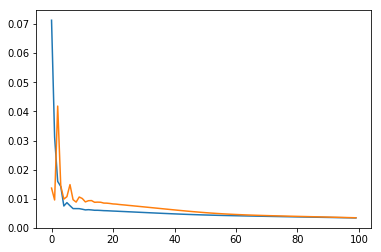

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [59]:
X_test[0]

array([[0.74339623],
       [0.6754717 ],
       [0.73584906],
       [0.73207547],
       [0.65283019],
       [0.68679245],
       [0.59622642]])

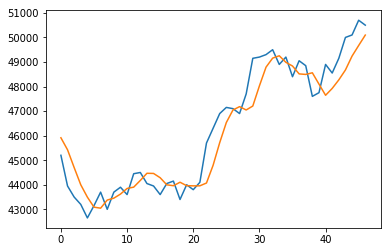

In [60]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [65]:
act = []
pred = []
#for i in range(250):
i=26
Xt = model.predict(X_test[i].reshape(1,7,1))
# print('predicted:{0}, actual:{1}'.format(,)
print(f"predicted:{scl.inverse_transform(Xt)}, actual:{scl.inverse_transform(y_test[i].reshape(-1,1))}")
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[47044.75]], actual:[[47100.]]


In [19]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

In [ ]:
#result_df.plot(kind='line')

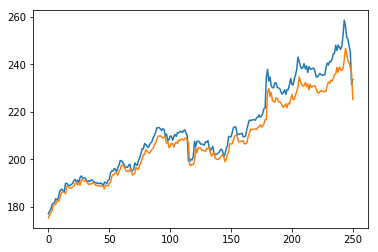

In [20]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))


In [ ]:
X_test[249]

In [ ]:
X_test[248]